<a href="https://colab.research.google.com/github/lizardnote/ML_practice/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 베르누이 확률분포
## Spicy bernoulli 클래스 사용


In [4]:
! pip install scipy



```
from scipy.stats import bernoulli

bernoulli.pmf(k,p)  #확률질량함수
bernoulli.cdf(k,p)  #누적분포함수
bernoulli.ppf(k,p)  #퍼센트 포인트 함수
bernoulli.rvs(p, size, random_state) #랜덤 샘플 함수

# k = 확률변수가 가질 수 있는 값 0 또는 1
# p = 베르누이 확률분포 모수인 성공확률
# q = 분위수를 알아내고 싶은 확률값을 의미함
```



In [7]:
from scipy.stats import bernoulli
import numpy as np

prob = bernoulli.pmf(1, 0.6)
print(prob)


0.6


# 이항분포




```
from scipy.stats import binom

binom.pmf(k, n, p)  #확률질량함수
binom.cdf(k, n, p)  #누적분포함수
binom.ppf(q, n, p)  #퍼센트 포인트 함수
binom.rvs(n, p, size, random_state) #랜덤 샘플 함수

# k = 관측된 성공 횟수
# n = 시행 횟수
# p = 성공 확률
# q = 분위수
```


동전을 10번 던졌을때 정확히 4번 앞면이 나올 확률은?

In [9]:
from scipy.stats import binom
prob1 = binom.pmf(4, n=10, p = 0.5)
print(prob1)

0.2050781249999999


적어도 4번 이상 나올 확률은?

In [10]:
prob2 = 1- binom.cdf(3, n=10, p = 0.5)
print(prob2)

0.828125




```
from scipy.stats import poisson

poisson.pmf(k, mu)  #확률질량함수
poisson.cdf(k, mu)  #누적분포함수
poisson.ppf(q, mu)  #퍼센트 포인트 함수
poisson.rvs(mu, size, random_state) #랜덤 샘플 함수

# k = 관측된 성공 횟수
# mu = 평균 발생 횟수
# q = 분위수를 알아내고 싶은 확률 값

** poisso.func() 에서 함수들은 모수 람다를 mu로 설정한 것에 주의!
```


단위 시간 당 평군 2번의 사건이 발생하는 시스템에서 (모수 lambda = 2) 3번의 사건이 발생할 확률

In [11]:
from scipy.stats import poisson
prob1 = poisson.pmf(3, mu = 2)
print(prob1)

0.18044704431548356


같은 시스템에서 5번 이상 사건이 발생할 확률은?

In [14]:
prob2 = poisson.sf(4, mu = 2)  #생존함수 sf 사용
print(prob2)

0.052653017343711125


In [15]:
1 - poisson.cdf(4,2) #생존함수 대신 1-누적확률함수 값을 빼도 동일하다

np.float64(0.052653017343711084)

호텔을 예약한 사람의 5%는 당일 호텔을 이용하지 않고 예약을 취소한다. 객실 수가 95개인 한 호텔에서 예약건수가 10이라고 할 때 당일 호텔에 도착한 사람들이 모두 호텔에 들어갈 확률은?

In [17]:
from scipy.stats import binom
1 - binom.cdf(4, 100, 0.05)

np.float64(0.5640186993142899)

In [18]:
from scipy.stats import poisson
1 - poisson.cdf(4, 5)

np.float64(0.5595067149347874)

# 정규분포



```
from scipy.stats import norm

norm.pdf(x, mu, sigma)
norm.cdf(x, mu, sigma)
norm.ppf(q, mu, sigma)
norm.rvs(mu, sigma, size, random_state)
```



In [19]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [20]:
mu1, sigma1 = 0, 1
mu2, sigma2 = 2, 1
mu3, sigma3 = 0, 2

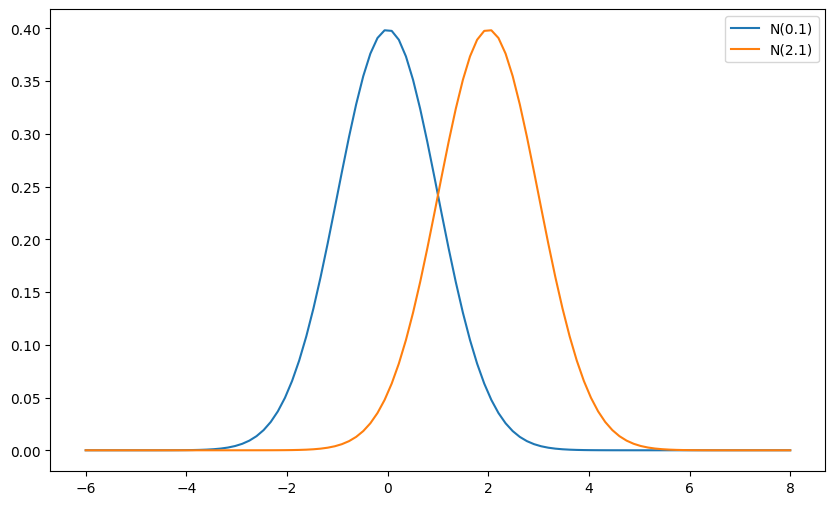

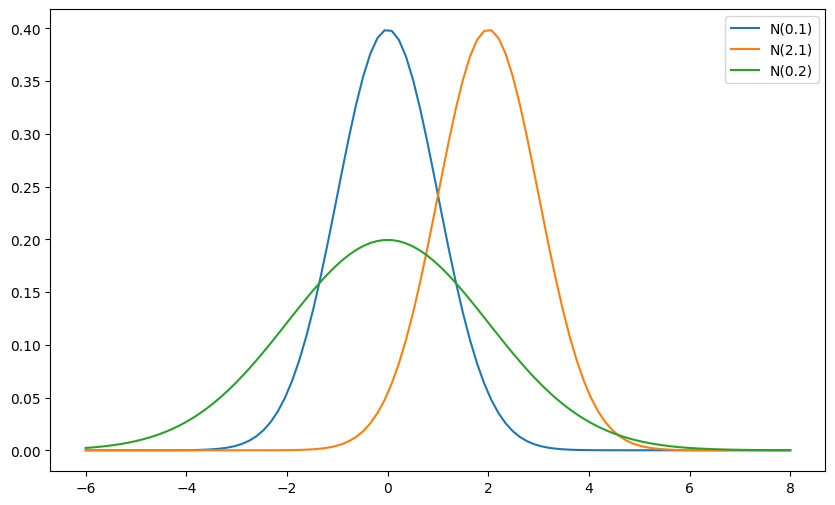

In [26]:
x = np.linspace(mu1 - 3*sigma3 , mu2+3*sigma3, 100)

pdf1 = norm.pdf(x, mu1, sigma1)
pdf2 = norm.pdf(x, mu2, sigma2)
pdf3 = norm.pdf(x, mu3, sigma3)

plt.figure(figsize =(10,6))
plt.plot(x, pdf1, label='N(0.1)')
plt.plot(x, pdf2, label='N(2.1)')
plt.legend()
plt.show()

plt.figure(figsize= (10,6))
plt.plot(x, pdf1, label='N(0.1)')
plt.plot(x, pdf2 ,label='N(2.1)')
plt.plot(x, pdf3 ,label='N(0.2)')
plt.legend()
plt.show()


모의고사 평균이 70이고 표준편차가 10점인 정규분포를 따를 때 한 학생이 85점 이상 받을 확률은 ?

In [28]:
from scipy.stats import norm

prob1 = norm.sf(85, loc = 70, scale = 10)
prob1

np.float64(0.06680720126885807)

그럼 65점 이상 75점 이하일 확률은?

In [30]:
from scipy.stats import norm
prob_between = norm.cdf(75, 70, 10) - norm.cdf(65,70,10)
print(prob_between)

0.38292492254802624


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [35]:
mu = 70
sigma = 10
n = 8

simulations = 10000

my_sample = np.random.normal(mu, sigma, (simulations, n))

In [36]:
sample_means = np.mean(my_sample, axis = 1)
sample_means.shape

(10000,)

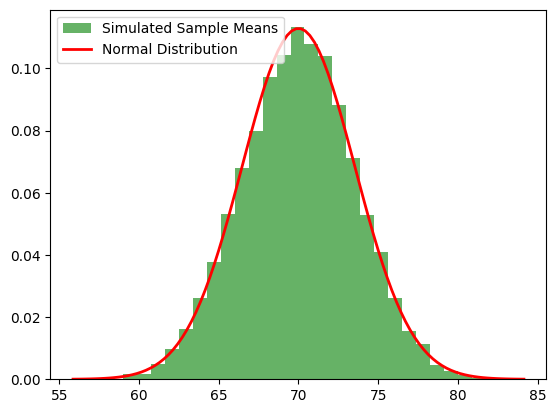

In [40]:
sample_mean_std = sigma / np.sqrt(n)
plt.hist(sample_means, bins = 30, density = True, alpha = 0.6, color = 'g', label= 'Simulated Sample Means')

x = np.linspace(mu - 4*sample_mean_std, mu+4*sample_mean_std, 100)
plt.plot(x, norm.pdf(x, mu, sample_mean_std), 'r', lw = 2,  label = 'Normal Distribution')
plt.legend()
plt.show()

이전 문제의 고등학교에서 8명의 학생을 무작위 선발하여 모의고사 평균을 구할 때 이 평균 점수가 72점일 확률은?

In [41]:
from scipy.stats import norm

prob = norm.sf(72, loc = 70, scale = 10 / (8**0.5))
prob

np.float64(0.28580382247666575)

# 카이제곱 분포




```
from scipy.stats import chi2

chi2.pdf(x, df)
chi2.cdf(x, df)
chi2.ppf(q, df)
chi2.rvs(mu, sigma, size, random_state)
```




# t분포



```
from scipy.stats import t

t.pdf(x, df)
t.cdf(x, df)
t.ppf(q, df)
t.rvs(mu, sigma, size, random_state)
```

